Text Mining

This scripts contains the following:

    1. Importing Libraries
    2. Twentieth-century scraped data 
    3. Tokenize the words 
    4. Removing stop words and punctuation marks 
    5. List of Top 10 POS tags 
    6. Bar plots with the top 15 POS labels—one each for nouns, verbs, and adjectives
    7. Dataframe with the countries 
    8. Plot


1. Importing Libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nehma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nehma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\nehma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


2. Twentieth-century scraped data 

In [2]:
# Import txt file
file_path = r"C:\Users\nehma\OneDrive\Desktop\Final Achievement\20th-century\20th_century_article_Wiki.txt"

with open(file_path, 'r', errors='ignore') as file:
    data = file.read().replace('\n', ' ')

3. Tokenize Words

In [3]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['Key', 'events', 'of', 'the', '20th', 'century', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'are', 'at', 'the', 'top', 'of', 'the', 'page', '.', 'Search', 'Search', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1Events', 'in', 'the', '20th', 'century', 'Toggle', 'Events', 'in', 'the', '20th', 'century', 'subsection', '1.1The', 'world', 'at', 'the', 'beginning', 'of', 'the', 'century', '1.1.1', "''", 'The', 'war', 'to', 'end', 'all', 'wars', "''", ':', 'World', 'War', 'I', '(', '1914â€', '“', '1918', ')', '1

In [4]:
# Create a frequency distribution
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 4910 samples and 21266 outcomes>


In [5]:
dist_words.most_common(10)  #most common words

[('.', 1571),
 ('the', 1097),
 (',', 990),
 ('of', 605),
 ('and', 398),
 ('to', 325),
 ('The', 318),
 ('[', 303),
 (']', 303),
 ('in', 291)]

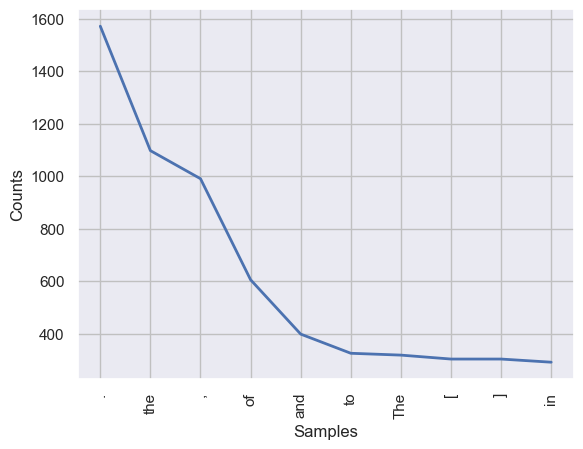

<Axes: xlabel='Samples', ylabel='Counts'>

In [6]:
dist_words.plot(10,cumulative = False)

The word "the" is mentioned the most, followed by the "." and then "of" and "and".  

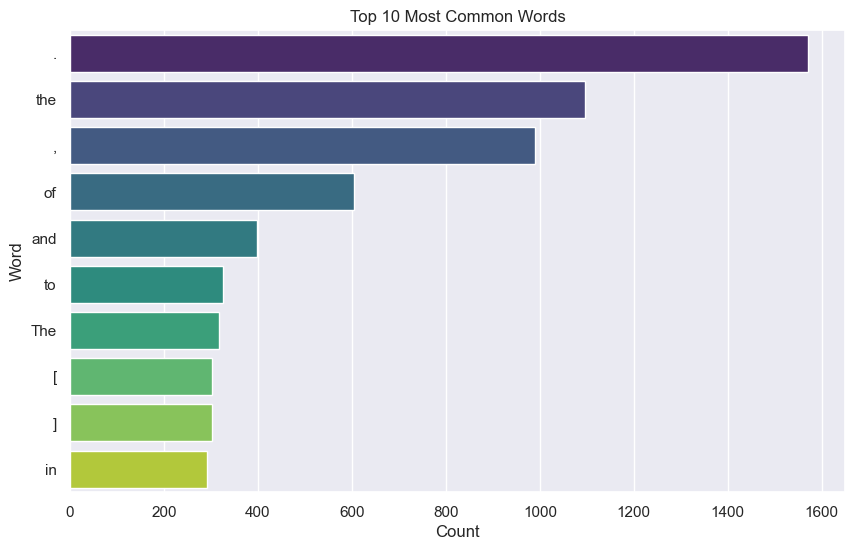

In [7]:
top_10_words = dist_words.most_common(10)

# Create a DataFrame for Seaborn plotting
top_10_words_df = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=top_10_words_df, palette='viridis')
plt.title('Top 10 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

5. Removing stop words and Puncutation

In [8]:
# Defining stopwords, first define 

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'once', 'both', 'between', 'again', 'isn', 'mustn', 'it', 'i', 'couldn', "hadn't", 'same', 'why', "couldn't", "haven't", 'being', 'wasn', "wasn't", 'so', 'or', "hasn't", 'off', 'ma', "wouldn't", 'down', 'too', 'shouldn', 'ourselves', 'during', 'out', 'under', 'hasn', 'doing', 'over', 'ain', 'those', 'shan', 'here', "doesn't", 'they', 'should', 'the', 'with', 'am', 'doesn', 'into', 'm', 'mightn', 'some', 'of', 'then', 'this', 'a', 'but', 'needn', 'don', 've', "should've", 'after', 'll', 'these', 'been', 'such', "shan't", 'and', 'yours', 'o', 'itself', 'further', 'd', "she's", 'because', 'up', 'yourself', 'that', 'her', "needn't", 'as', 'me', 'very', 'were', 'if', 'nor', 'had', 'there', 'hadn', 'against', "mightn't", 'all', "it's", 'are', 'hers', 'in', 'y', "you'd", "isn't", 'ours', 'was', 'myself', "didn't", 'she', 'aren', 'below', 'does', 'above', 'which', 'before', 'you', 'just', 'than', 't', 'about', "aren't", 'him', 'himself', 'any', 'his', 'their', 'by', 'few', 'until', 's', 'now'

In [9]:
# Removing stopwords in words

filtered_words = [] # creates an empty list
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [10]:
filtered_words

['Key',
 'events',
 '20th',
 'century',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'usDonate',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'file',
 'Languages',
 'Language',
 'links',
 'top',
 'page',
 '.',
 'Search',
 'Search',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1Events',
 '20th',
 'century',
 'Toggle',
 'Events',
 '20th',
 'century',
 'subsection',
 '1.1The',
 'world',
 'beginning',
 'century',
 '1.1.1',
 "''",
 'The',
 'war',
 'end',
 'wars',
 "''",
 ':',
 'World',
 'War',
 'I',
 '(',
 '1914â€',
 '“',
 '1918',
 ')',
 '1.1.2The',
 'Russian',
 'Revolution',
 'Communism',
 '1.2Between',
 'wars',
 '1.2.1Eco

In [11]:
# Create a frequency distribution
from nltk.probability import FreqDist
freq_distribution = FreqDist(filtered_words)
print(freq_distribution)

<FreqDist with 4807 samples and 16596 outcomes>


In [12]:
from nltk.probability import FreqDist

freq_distribution = FreqDist(filtered_words)
top_words = freq_distribution.most_common(10)


In [13]:
top_words

[('.', 1571),
 (',', 990),
 ('The', 318),
 ('[', 303),
 (']', 303),
 ("''", 279),
 ('``', 273),
 ('^', 268),
 ('(', 242),
 (')', 242)]

In [14]:
#removing all punctuations marks
import re

filtered_words_str = ' '.join(filtered_words)
text_without_punc = re.sub("[^a-zA-Z]", " ", filtered_words_str)

print(text_without_punc)


Key events   th century   Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Languages Language links top page   Search Search Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide   Top    Events   th century Toggle Events   th century subsection    The world beginning century          The war end wars      World War I                        The Russian Revolution Communism    Between wars      Economic depression      The rise dictatorship    Global war   World War II                        The war Europe      Blitzkrieg      Operation Barbarossa      Turning tides      Operation Overlord      Final days      The war Pacific        Background      Japanese Expansion      Allied offensive       Final days       The Holocaust       The Nuclear Age begins

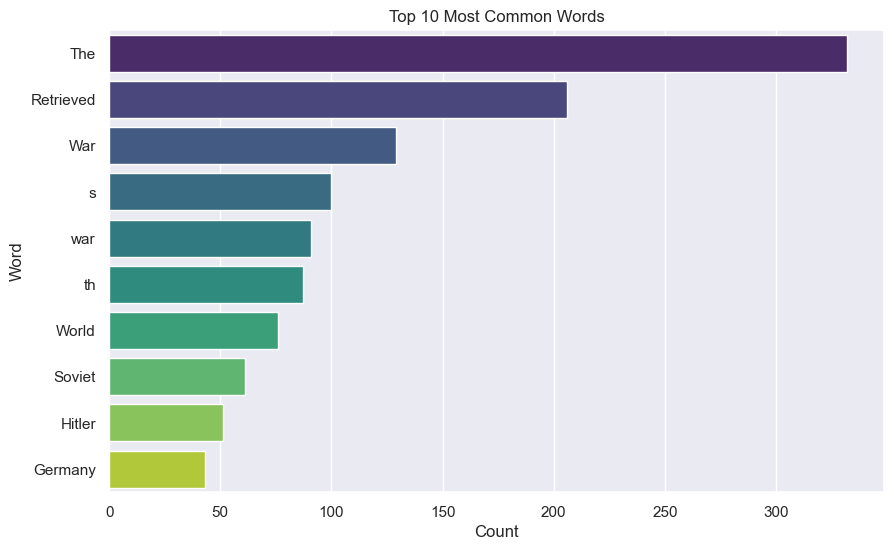

In [15]:
#rerun plot

# Tokenize the text without punctuation
tokenized_words_without_punc = nltk.word_tokenize(text_without_punc)

# Create a new frequency distribution
dist_words = FreqDist(tokenized_words_without_punc)

# Get the top 10 words
top_10_words = dist_words.most_common(10)

# Create a DataFrame for Seaborn plotting
top_10_words_df = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=top_10_words_df, palette='viridis')
plt.title('Top 10 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()


In [16]:
#It is looking better, however I still need to remove some of the words

In [17]:
new_stopwords = ["th", 's', 'The', 'ISBN', 'www']

In [18]:
stop_words.update(new_stopwords) #updating new stop words


In [19]:
stop_words

{'ISBN',
 'The',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'o

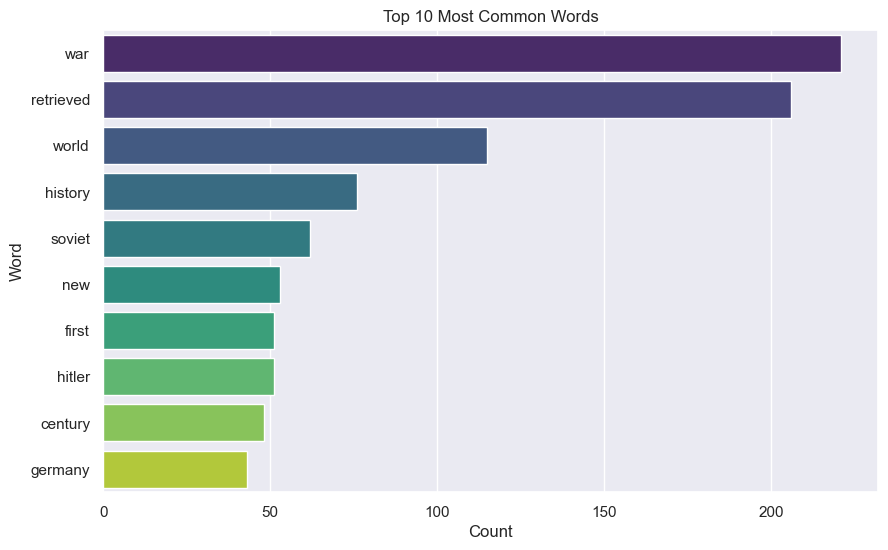

In [20]:
# Combine the removal of punctuation and new_stopwords
filtered_words_combined = [
    word.lower() for word in nltk.word_tokenize(text_without_punc)
    if word.isalpha() and word.lower() not in (stop_words.union(new_stopwords))
]

# Create a new frequency distribution
dist_words_combined = FreqDist(filtered_words_combined)

# Get the top 10 words
top_10_words_combined = dist_words_combined.most_common(10)

# Create a DataFrame for Seaborn plotting
top_10_words_df_combined = pd.DataFrame(top_10_words_combined, columns=['Word', 'Count'])

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Word', data=top_10_words_df_combined, palette='viridis')
plt.title('Top 10 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

POS Tags with TextBlob

In [21]:
# Tokenize the text without punctuation
tokenized_words_without_punc = nltk.word_tokenize(text_without_punc)

In [22]:
filtered = []
for word in tokenized_words_without_punc:
    if word not in new_stopwords:
        filtered.append(word)

In [23]:
%%time
text = TextBlob(str(filtered))

CPU times: total: 0 ns
Wall time: 9.49 ms


In [24]:
text

TextBlob("['Key', 'events', 'century', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'usDonate', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'file', 'Languages', 'Language', 'links', 'top', 'page', 'Search', 'Search', 'Create', 'account', 'Log', 'Personal', 'tools', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Events', 'century', 'Toggle', 'Events', 'century', 'subsection', 'world', 'beginning', 'century', 'war', 'end', 'wars', 'World', 'War', 'I', 'Russian', 'Revolution', 'Communism', 'Between', 'wars', 'Economic', 'depression', 'rise', 'dictatorship', 'Global', 'war', 'World', 'War', 'II', 'war', 'Europe', 'Blitzkrieg', 'Operation', 'Barbarossa', 'Turning', 'tides', 'Operation', 'Overlord', 'Final', 'days', 'war', 'Pacific'

In [25]:
tags_list = text.tags

In [26]:
tags_list

[('[', 'JJ'),
 ("'Key", 'NNP'),
 ("'", 'POS'),
 ("'events", 'NNS'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'usDonate", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'file", 'IN'),
 ("'Languages", 'NNS'),
 ("'", 'POS'),
 ("'Language", 'NN'),
 ("'links", 'NNS'),
 ("'", 'POS'),
 ("'top", 'NNP'),
 ("'", 'POS'),
 ("'page", 'NN'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Create"

In [27]:
df_text = pd.DataFrame(tags_list)
df_text.columns = ['Words', "Word type"]

In [28]:
df_text.head()

,Words,Word type
0,[,JJ
1,'Key,NNP
2,',POS
3,'events,NNS
4,',POS


In [29]:
df_t = df_text.groupby('Word type').count().reset_index()

In [30]:
df_t.head()

,Word type,Words
0,CC,1
1,CD,75
2,DT,13
3,EX,12
4,FW,43


In [31]:
top20 = df_t.nlargest(20, 'Words')

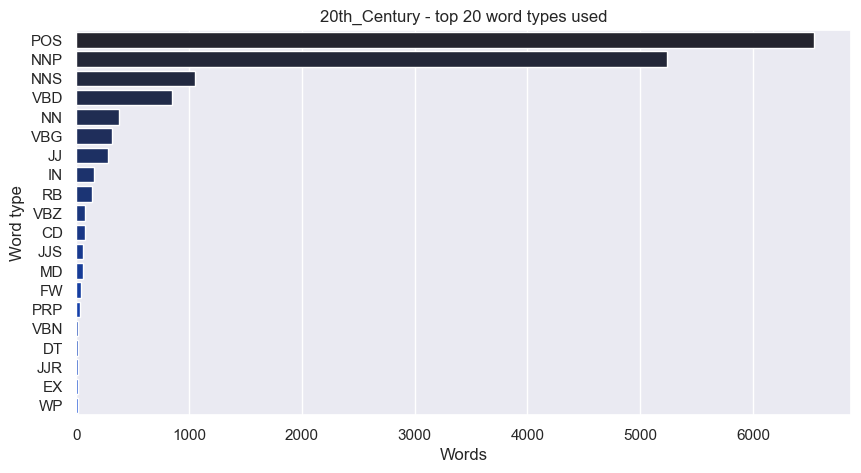

In [32]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
    sns.barplot(x = "Words", y = "Word type",
    saturation = 0.9, data = top20).set_title("20th_Century - top 20 word types used")

In [33]:
#Nouns
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNP")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [34]:
top10

,Word,Occurences
1260,'War,129
2585,'war,91
1307,'World,76
1106,'Soviet,61
536,'Hitler,51
535,'History,41
1496,'century,41
2611,'world,39
568,'In,38
1779,'first,38


#Note, here I tried combining 'War' and 'war' but couldn't

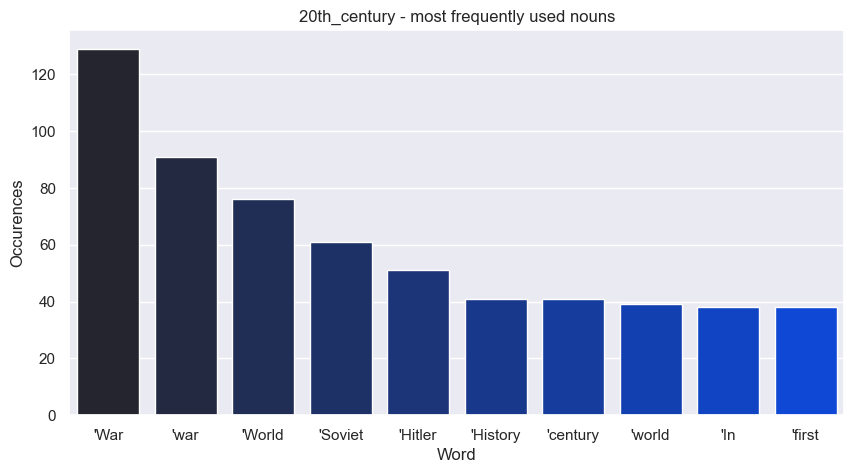

In [35]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data = top10).set_title("20th_century - most frequently used nouns")

Here 'War' and 'war' should be combined

Verbs

In [37]:
df = df_text[(df_text['Word type'] == "VB")  | (df_text['Word type'] == "VBD")]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')

In [38]:
top10

,Word,Occurences
26,'Retrieved,206
35,'United,30
0,'Allied,19
195,'led,15
315,'used,13
193,'launched,12
1,'Archived,10
92,'controlled,9
160,'forced,8
307,'turned,7


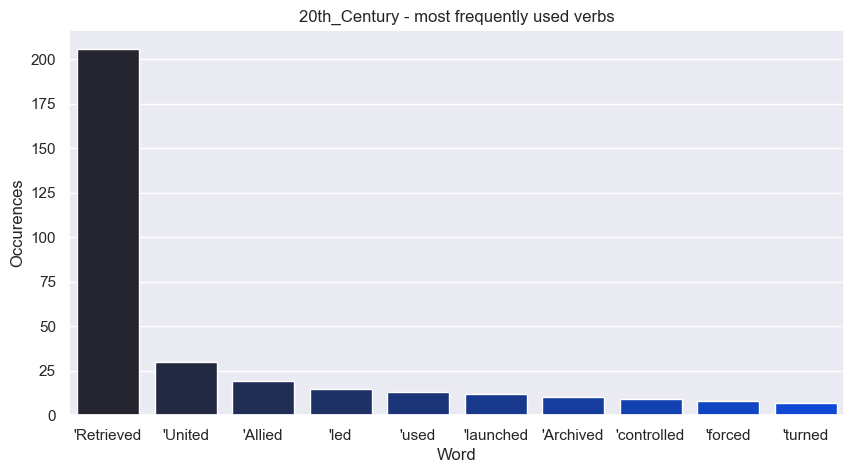

In [39]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x = "Word", y = "Occurences",
    saturation = 0.9, data = top10).set_title("20th_Century - most frequently used verbs")

Adjectives

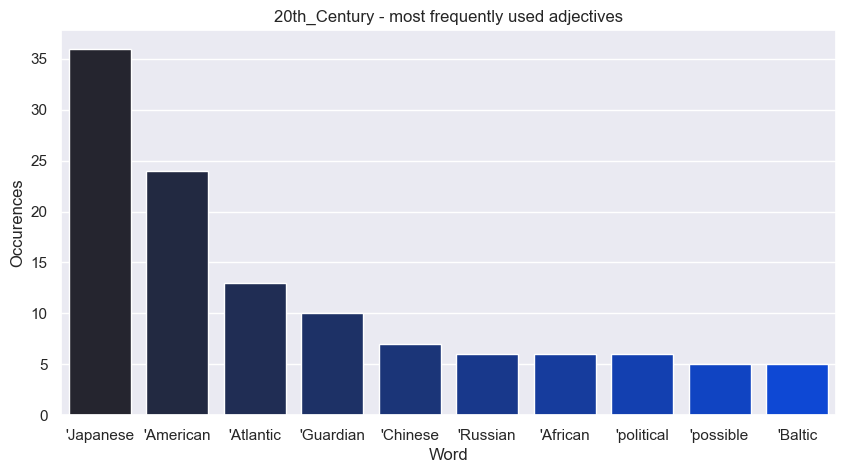

In [40]:
df = df_text[df_text['Word type'] == "JJ"]
df.columns = ["Word", "Occurences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by=['Occurences'], ascending=False)
top10 = y.nlargest(10, 'Occurences')
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Word", y="Occurences",
    saturation=0.9, data=top10).set_title("20th_Century - most frequently used adjectives")

The plots are as expected (based on the article)

In [41]:
#import country list

file_path = r'C:\Users\nehma\OneDrive\Desktop\Final Achievement\countries_list_20th_century_1.5.csv'

# Read the CSV file into a DataFrame
country = pd.read_csv(file_path, index_col = 0)




In [42]:
print(country.columns)

Index(['Country Name', 'Country_trimmed'], dtype='object')


In [43]:
country.head()

,Country Name,Country_trimmed
Number,,
1,Afghanistan,Afghanistan
2,Albania,Albania
3,Algeria,Algeria
4,Andorra,Andorra
5,Angola,Angola


In [44]:
listToStr = ' '.join([str(elem) for elem in filtered])
 
print(listToStr)

Key events century Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate Contribute HelpLearn editCommunity portalRecent changesUpload file Languages Language links top page Search Search Create account Log Personal tools Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Events century Toggle Events century subsection world beginning century war end wars World War I Russian Revolution Communism Between wars Economic depression rise dictatorship Global war World War II war Europe Blitzkrieg Operation Barbarossa Turning tides Operation Overlord Final days war Pacific Background Japanese Expansion Allied offensive Final days Holocaust Nuclear Age begins post war world end empires decolonization Cold War War proxy space race end Cold War Information communications technology world end century See also References Sources External links Toggle table cont

In [48]:
import re
from collections import Counter
import pandas as pd


listToStr = ' '.join([str(elem) for elem in filtered])

# Extract 'Country_trimmed' column from the DataFrame
country_trimmed = country['Country_trimmed'].tolist()

# Create a pattern to match the trimmed country names
pattern = fr'\b(?:{"|".join(map(re.escape, country_trimmed))})\b'

# Use re.findall to find all matches in the input string
matches = re.findall(pattern, listToStr, flags=re.IGNORECASE)

# Use Counter to count occurrences of each country
all_counts = Counter(matches)

# Create a new DataFrame to store the counts
counts_df = pd.DataFrame(list(all_counts.items()), columns=['Country', 'Mentions'])


print(counts_df)



        Country  Mentions
0        France        16
1         Italy        15
2        Russia        10
3       Germany        43
4       Austria         5
..          ...       ...
57         Cuba         3
58       Canada         2
59      Ireland         1
60  Afghanistan         1
61      Lebanon         1

[62 rows x 2 columns]


In [46]:
counts_df.head()


,Country,Mentions
0,France,16
1,Italy,15
2,Russia,10
3,Germany,43
4,Austria,5


In [55]:
# Sort the DataFrame by 'Mentions' column in descending order
df_sorted = counts_df.sort_values(by='Mentions', ascending=False)

# Get the top 15 countries
top_15_countries = df_sorted.head(15)

# Print the top 15 countries
print(top_15_countries)  #Germany and Japan leads the countries that are mentioned in the article.


          Country  Mentions
3         Germany        43
28          Japan        33
8   United States        23
0          France        16
1           Italy        15
10         Poland        13
47        Vietnam        13
2          Russia        10
37          India         9
24          Libya         5
19         Norway         5
33    Philippines         5
4         Austria         5
41         Israel         4
40       Pakistan         4


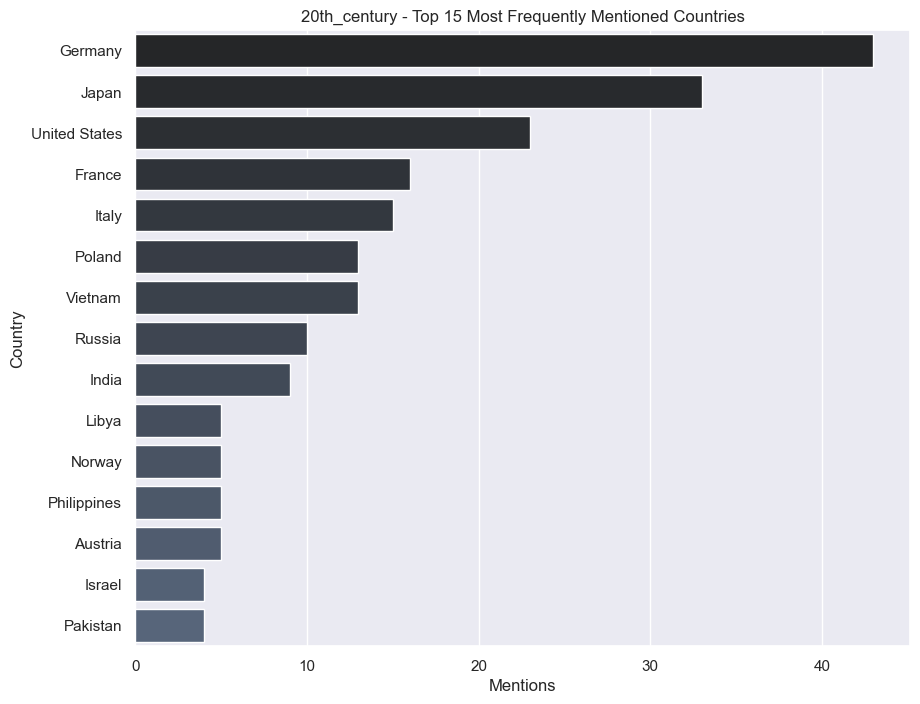

In [57]:
# Create the bar plot for the top 15 countries
plt.figure(figsize=(10, 8))
with sns.dark_palette("#79C", 27):
    sns.barplot(x="Mentions", y="Country",
                data=top_15_countries)
    plt.title("20th_century - Top 15 Most Frequently Mentioned Countries")
    plt.xlabel("Mentions")
    plt.ylabel("Country")
    plt.show()

Based on the graph Germany, Japan, United States, France and Italy are the top 5 countries mentioned.  I think that should make sense.